# Imports


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix

In [3]:
cor_mat = np.array([
    [1.0, 0.83, 0.72, 0.72, 0.50, 0.34, 0.31, 0.25],
    [0.83, 1.0, 0.42, 0.38, 0.14, 0.25, 0.12, 0.1],
    [0.72, 0.42, 1.0, 0.32, 0.42, 0.31, 0.46, 0.19],
    [0.72, 0.38, 0.32, 1.0, 0.44, 0.21, 0.20, 0.29],
    [0.5, 0.14, 0.42, 0.44, 1.0, 0.20, 0.22, 0.20],
    [0.34, 0.25, 0.31, 0.21, 0.20, 1.0, 0.20, 0.093],
    [0.31, 0.12, 0.46, 0.20, 0.22, 0.20, 1.0, 0.26],
    [0.25, 0.10, 0.19, 0.29, 0.20, 0.093, 0.26, 1.0]
])
score_names = ["S = S0 + S01 + S10 + S1", "S0 (Matrix Factorization)", "S01 (User2User)", "S10 (Item2Item)", "S1", "Matrix Factorization", "User2User_CF", "Item2Item_CF"]


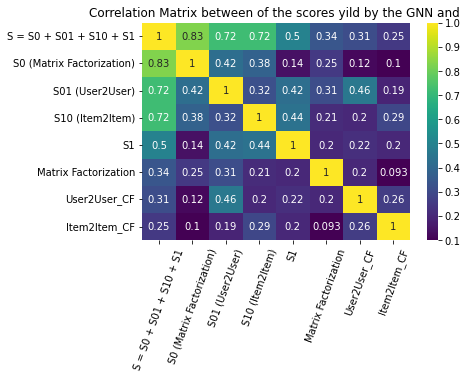

In [4]:
sns.heatmap(cor_mat, annot=True, cmap="viridis", vmin=0.1, vmax=1)
plt.title("Correlation Matrix between of the scores yild by the GNN and ")
plt.xticks([0.5 + i for i in range(len(score_names))], score_names, rotation=70)
plt.yticks([0.5 + i for i in range(len(score_names))], score_names, rotation=0)
plt.show()


# Model Fidelity

Model fidelity of GRACE and GNNExplainer using only the first 100 users and the top 1000 items predicted by the GNN

In [5]:
nb_users = [0, 1, 10, 100]
nb_items = [0, 1, 10, 100]

grace_mf = np.array([
    [0.532,  0.5588, 0.5688, 0.5832],
    [0.5448, 0.5484, 0.5568, 0.5732],
    [0.5428, 0.5408, 0.5524, 0.568 ],
    [0.6332, 0.634,  0.652,  0.6728]
])

grace_abs_mf = np.array([
    [0.532,  0.5584, 0.5712, 0.5844],
    [0.5448, 0.5488, 0.558,  0.576 ],
    [0.544,  0.5404, 0.5528, 0.57  ],
    [0.6328, 0.6332, 0.6512, 0.6664]
])

gnnexplainer_mf = np.array([
    [0.532,  0.4656, 0.5128, 0.5376],
    [0.4608, 0.4852, 0.5236, 0.5432],
    [0.5284, 0.552,  0.5796, 0.6032],
    [0.6776, 0.7156, 0.7912, 0.826 ]
])

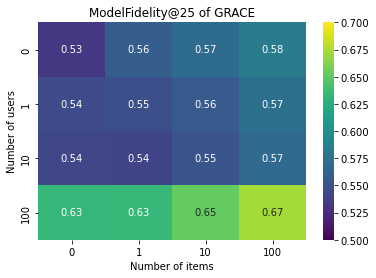

In [15]:
sns.heatmap(grace_mf, vmin=0.5, vmax=0.7, cmap="viridis", annot=True)
plt.title("ModelFidelity@25 of GRACE")
plt.xlabel("Number of items")
plt.ylabel("Number of users")
plt.xticks([0.5, 1.5, 2.5, 3.5], nb_items)
plt.yticks([0.5, 1.5, 2.5, 3.5], nb_users)
plt.savefig("grace_mf.png", dpi=300)
plt.show()



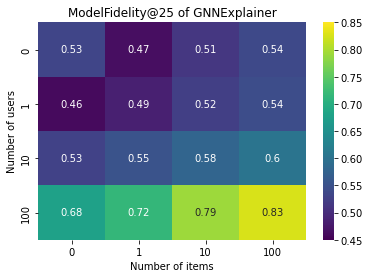

In [7]:
sns.heatmap(gnnexplainer_mf, vmin=0.45, vmax=0.85, cmap="viridis", annot=True)
plt.title("ModelFidelity@25 of GNNExplainer")
plt.xlabel("Number of items")
plt.ylabel("Number of users")
plt.xticks([0.5, 1.5, 2.5, 3.5], nb_items)
plt.yticks([0.5, 1.5, 2.5, 3.5], nb_users)
plt.show()



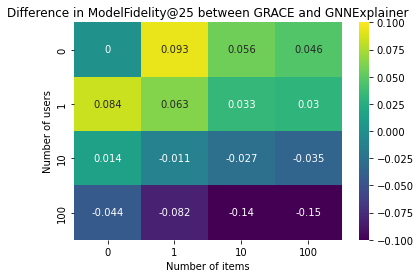

In [17]:
sns.heatmap(grace_mf - gnnexplainer_mf, vmin=-0.1, vmax=0.1, cmap="viridis", annot=True)
plt.title("Difference in ModelFidelity@25 between GRACE and GNNExplainer")
plt.xlabel("Number of items")
plt.ylabel("Number of users")
plt.xticks([0.5, 1.5, 2.5, 3.5], nb_items)
plt.yticks([0.5, 1.5, 2.5, 3.5], nb_users)
plt.savefig("grace_gnnexplainer_mf.png", dpi=300, bbox_inches='tight')
plt.show()


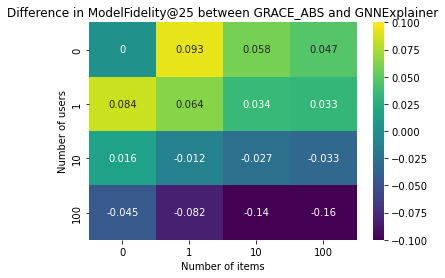

In [9]:
sns.heatmap(grace_abs_mf - gnnexplainer_mf, vmin=-0.1, vmax=0.1, cmap="viridis", annot=True)
plt.title("Difference in ModelFidelity@25 between GRACE_ABS and GNNExplainer")
plt.xlabel("Number of items")
plt.ylabel("Number of users")
plt.xticks([0.5, 1.5, 2.5, 3.5], nb_items)
plt.yticks([0.5, 1.5, 2.5, 3.5], nb_users)
plt.show()



# COMP